In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import random
import math 
from prettytable import PrettyTable

#Punto A

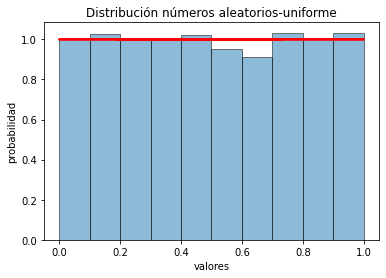

In [2]:
# Graficando Uniforme
x = np.random.uniform(0,1,10000)
fp = stats.uniform.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
data=[]
for i in range(10000):
    data.append(random.random())
 
#Graficación del histograma con la densidad superpuesta
plt.hist(data,density=True,alpha=0.5, histtype='bar', ec='black')
ax.plot(x, fp, linewidth=2,color='red')
plt.title('Distribución números aleatorios-uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

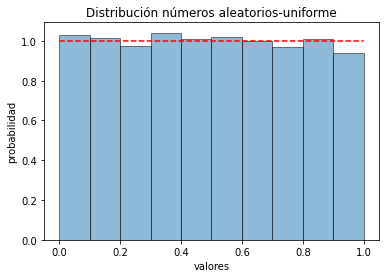

In [3]:
# #Numpy.random
rng = np.random.default_rng()

# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0),
                uniforme.ppf(1), 10000)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
data=[]
for i in range(10000):
    data.append(rng.random())

plt.hist(data,density=True,alpha=0.5, histtype='bar', ec='black')
ax.plot(x, fp, '--',color='red')
plt.title('Distribución números aleatorios-uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')

plt.show()


# Punto B

Ejercicio 1

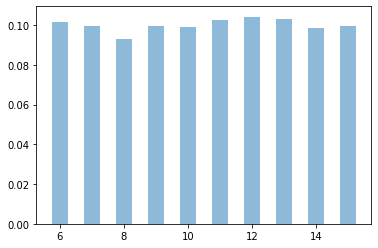

In [4]:
#Función que calcula la función de masa de probabilidad de la variable aleatoria
def masa_prob(x):
    base=range(6,16)
    
    if x in base:
        return 1/10
    return 0

#Función que calcula la función probabilidad acumulada de la variable aleatoria
def acumm_prob(x):
    prob={6:1/10,7:2/10,8:3/10,9:4/10,10:5/10,
        11:6/10,12:7/10,13:8/10,14:9/10} #Definimos las probabilidades
   
    for i,j in prob.items():
        if i+1>x>=i:
            return prob[i]
    if x>=15:
        return 1
    return 0

#Función que simula la variable aleatoria
def generator(x):
    for i in range(5,16):
        if acumm_prob(i)<x<=acumm_prob(i+1):
            return i+1
    return 1

#Graficación del histograma 
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,rwidth=0.5,align='left',bins=range(6,17))
plt.show()



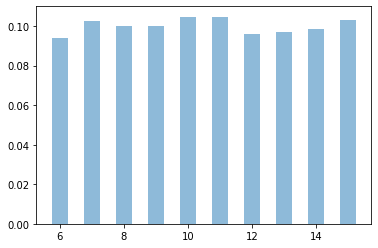

In [5]:
def generator(x):
    return math.floor(x*10) + 6
  
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,rwidth=0.5,align='left',bins=range(6,17))
plt.show()


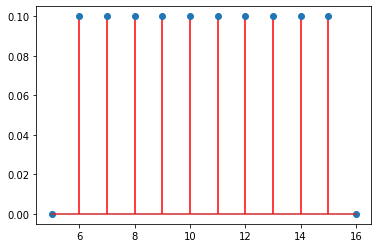

In [6]:
#Graficación de la masa de probabilidad teorica
masa=[]
for i in range(5,17):
    masa.append(masa_prob(i))

plt.stem(range(5,17),masa,linefmt='red',use_line_collection=True)
plt.show()

Ejercicio 2

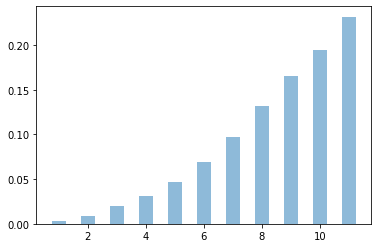

In [7]:
#Función que calcula la probabilidad
def value_prob():
    d={1:1/506}
    c=1/506
    for i in range(2,12):
        c+=i**2/506
        d[i]=c
    return d
    
#Definimos la probabilidad
prob=value_prob()

#Función que calcula la función de masa de probabilidad de la variable aleatoria
def masa_prob(x):
    base=range(1,12)
    
    if x in base:
        return x**2/506
    return 0

#Función que calcula la función probabilidad acumulada de la variable aleatoria
def acumm_prob(x):
    global prob
    for i,j in prob.items():
        if i+1>x>=i:
            return prob[i]
    if x>=15:
        return 1
    return 0

#Función que simula la variable aleatoria
def generator(x):
    for i in range(1,12):
        if acumm_prob(i)<x<=acumm_prob(i+1):
            return i+1
    return 1

#Graficación del histograma
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,rwidth=0.5,align='left',bins=range(1,13))
plt.show()


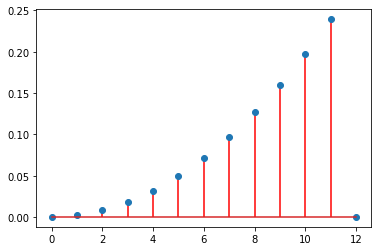

In [8]:
#Graficación de la masa de probabilidad teorica
masa=[]
for i in range(0,13):
    masa.append(masa_prob(i))

plt.stem(range(0,13),masa,linefmt='red',use_line_collection=True)
plt.show()

Ejercicio 3

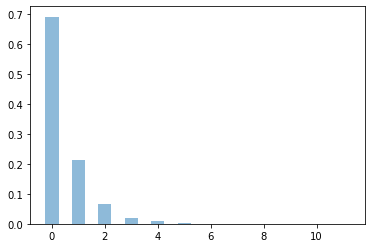

In [9]:
#Definimos la probabilidad
prob=11/16

#Función que calcula la función de masa de probabilidad de la variable aleatoria
def masa_prob(x):
    global prob

    return ((1-prob)**x)*prob
    
#Función que calcula la función probabilidad acumulada de la variable aleatoria
def acumm_prob(x):
    global prob
    return 1-((1-prob)**(int(x)))

#Función que simula la variable aleatoria
def generator(x):
    for i in range(0,11):
        if acumm_prob(i)<x<=acumm_prob(i+1):
            return i
    return 1

#Graficación del histograma
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,rwidth=0.5,align='left',bins=range(0,13))
plt.show()


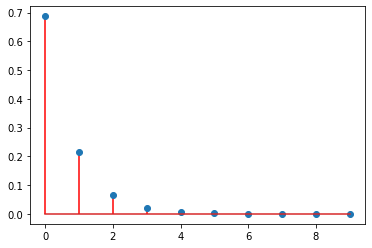

In [10]:
#Graficación de la masa de probabilidad teorica
masa=[]
for i in range(0,10):
    masa.append(masa_prob(i))

plt.stem(range(0,10),masa,linefmt='red',use_line_collection=True)
plt.show()


# Punto C

Ejercicio 1

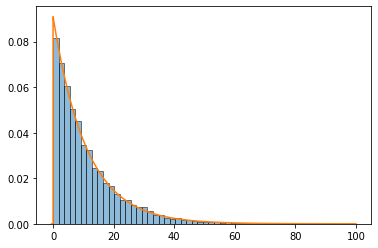

In [11]:
#Definimos la probabilidad
prob=1/11

#Función que calcula la función de masa de probabilidad de la variable aleatoria
def masa_prob(x):
    global prob
    if x>=0:
        return prob*math.exp(-prob*x)
    return 0

#Función que calcula la función probabilidad acumulada de la variable aleatoria
def acumm_prob(x):
    global prob
    if x>=0:
        return 1-math.exp(-prob*x)
    return 0

#Función que simula la variable aleatoria
def generator(x):
    global prob
    return math.log(1-x)/-prob
    
#Graficación del histograma con la densidad superpuesta
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,bins=50,histtype='bar',
         ec='black')

dominio=np.arange(-0.5,100,0.001)
masa=[]

for i in dominio:
    masa.append(masa_prob(i))

plt.plot(dominio,masa)

plt.show()

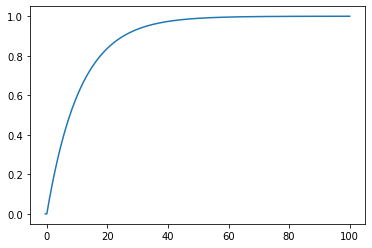

In [12]:
acumm=[]

for i in dominio:
    acumm.append(acumm_prob(i))

plt.plot(dominio,acumm)
plt.show()

Ejercicio 2

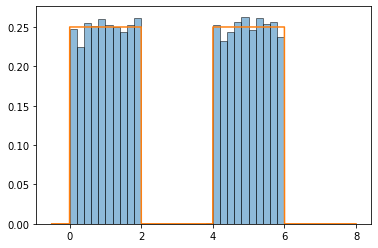

In [13]:
#Función que calcula la función de masa de probabilidad de la variable aleatoria
def masa_prob(x):
    
    if (x>=0 and  x<=2) or (x>=4 and  x<=6):
        return 1/4
    return 0

#Función que calcula la función probabilidad acumulada de la variable aleatoria
def acumm_prob(x):
    
    if x>=0 and x<=2:
        return x/4
    elif x>2 and x<4:
        return 1/2
    elif x>=4 and x<=6:
        return x/4-1/2
    elif x>6:
        return 1
    return 0

#Función que simula la variable aleatoria
def generator(x):
    if x<1/2:
        return 4*x
    return 4*(x+1/2)
    
#Graficación del histograma con la densidad superpuesta
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,bins=30,histtype='bar', ec='black')

dominio=np.arange(-0.5,8,0.001)
masa=[]

for i in dominio:
    masa.append(masa_prob(i))

plt.plot(dominio,masa)
plt.show()


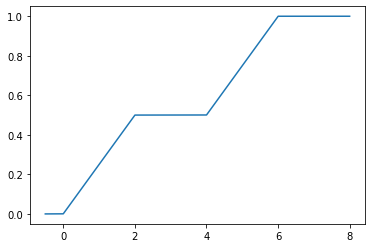

In [14]:
acumm=[]

for i in dominio:
    acumm.append(acumm_prob(i))

plt.plot(dominio,acumm)

plt.show()

Ejercicio 3

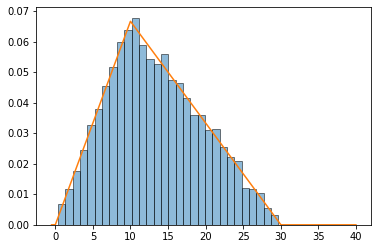

In [15]:
#Función que calcula la función de masa de probabilidad de la variable aleatoria
def masa_prob(x):
    
    if (x>=0 and  x<=10) :
        return x/150
    elif (x>=10 and  x<=30) :
        return 1/10-x/300
    return 0

#Función que calcula la función probabilidad acumulada de la variable aleatoria
def acumm_prob(x):
    
    if x>=0 and x<=10:
        return x**2/300
    elif x>10 and x<=30:
        return x/10+(-x**2)/600-1/2
    elif x>30:
        return 1
    return 0

#Función que simula la variable aleatoria
def generator(x):
    if x<=1/3:
        return (x*300)**(1/2)
    b=-60
    c=-2400
    z1=-(b+(c*x-c)**(1/2))/2
    
    return z1
   
    
#Graficación del histograma con la densidad superpuesta
data=[]
for i in range(10000):
    data.append(generator(random.random()))

plt.hist(data,density=True,alpha=0.5,bins=30,histtype='bar', ec='black')

dominio=np.arange(-0.5,40,0.001)
masa=[]

for i in dominio:
    masa.append(masa_prob(i))

plt.plot(dominio,masa)
plt.show()


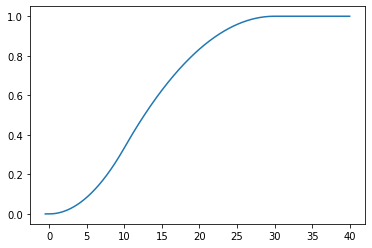

In [16]:
acumm=[]

for i in dominio:
    acumm.append(acumm_prob(i))

plt.plot(dominio,acumm)
plt.show()

# Punto D

Ejercicio 1

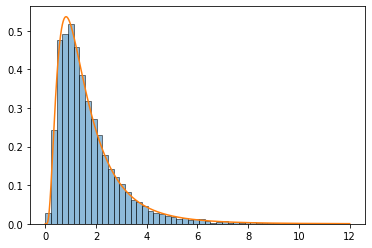

In [17]:
#Simulación de la variable aleatoria para m=10000 
simY=[]

for i in range(0,10000):
  simY.append(np.exp(np.random.normal()))

#Función que calcula la función de densidad de una distribución lognormal
def log_normal(x,media,var):
    ex=np.exp(-(np.log(x)-media)**2/(2*var))
    distribucion=ex/(x*(var*2*np.pi)**0.5)
    return distribucion

#Graficación de del histograma de variable aleatoria del ejercicio 1, con la función de densidad de una distribución lognormal superpuesta
dominio=np.arange(0.001,12,0.001)
rango=log_normal(dominio,0.3,0.5)
data=np.random.normal(0.3,0.5**0.5,10000)
y=np.exp(data)
plt.hist(y,density=True,alpha=0.5, histtype='bar', ec='black',bins=np.linspace(0,11,50))
plt.plot(dominio,rango)
plt.show()

In [18]:
#Función que calcula los momentos, de manera teorica, de la variable aleatoria dada en el ejercicio 1 y 2
def momentos(r,media,var):
    return np.exp(media*r+var*r**2/2)
print("Teorico : ",momentos(1,0.3,0.5),momentos(2,0.3,0.5),momentos(5,0.3,0.5))

#Función que calcula los momentos, usando el metodo 3, de la varianle aleatoria dada en el ejercicio 1 y 2
def metodo3(r,moment):
    data=np.random.normal(0.3,0.5**0.5,r)
    y=np.exp(data)**moment
    return np.sum(y)/r
x = PrettyTable() #Impresión de los datos en una tabla
x.field_names = ["  ","E[Y]", "E[Y**2]", "E[Y**5]"]
for i in [10,100,1000, 10000]:
    x.add_row(["r="+str(i),metodo3(i,1),metodo3(i,2),metodo3(i,5)])
print(x)


Teorico :  1.7332530178673953 4.953032424395115 2321.572414611057
+---------+--------------------+--------------------+--------------------+
|         |        E[Y]        |      E[Y**2]       |      E[Y**5]       |
+---------+--------------------+--------------------+--------------------+
|   r=10  | 1.9863315814818132 | 1.9156448538816577 | 218.86633063730423 |
|  r=100  | 1.6637756156577188 | 3.857643961411319  | 357.69270457451455 |
|  r=1000 | 1.6842778745637952 | 4.3971798934032345 | 501.0530735629526  |
| r=10000 | 1.7203727500036574 | 4.899056962930392  | 3524.0791418597773 |
+---------+--------------------+--------------------+--------------------+


Ejercicio 2

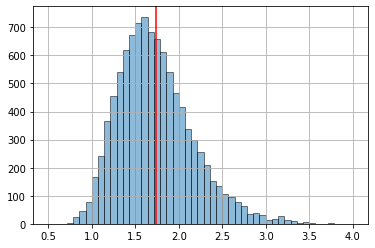

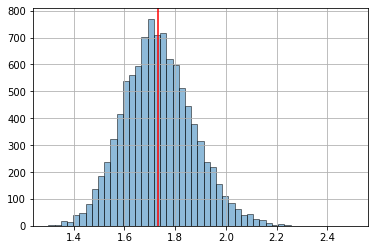

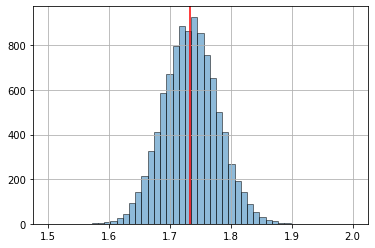

In [19]:
#Función simulación, que utiliza el método 3 para m realizaciones independientes para un cierto r, y un momento definido
def simulation(m,r,moment):
    result=[]
    for i in range(m):
        result.append(metodo3(r,moment))
    
    return result

#Evaluación y graficación para r=10,100,1000 y 10000, con m=10000
plt.hist(simulation(10000,10,1),alpha=0.5, histtype='bar', ec='black',bins=np.linspace(0.5,4,50))
plt.axvline(x=momentos(1,0.3,0.5), ymin=0, ymax=8000,color="red")
plt.grid()
plt.show()

plt.hist(simulation(10000,100,1),alpha=0.5, histtype='bar', ec='black',bins=np.linspace(1.3,2.5,50))
plt.axvline(x=momentos(1,0.3,0.5), ymin=0, ymax=8000,color="red")
plt.grid()
plt.show()

plt.hist(simulation(10000,1000,1),alpha=0.5, histtype='bar', ec='black',bins=np.linspace(1.5,2,50))
plt.axvline(x=momentos(1,0.3,0.5), ymin=0, ymax=8000,color="red")
plt.grid()
plt.show()
print("")

Parte Bonus

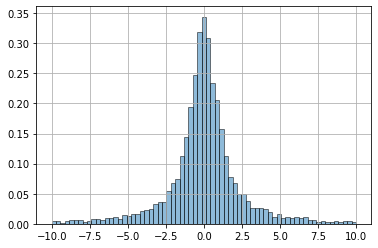

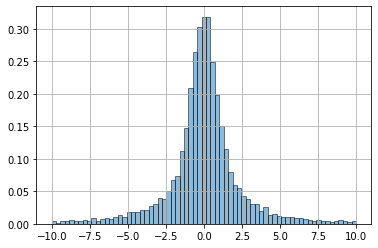

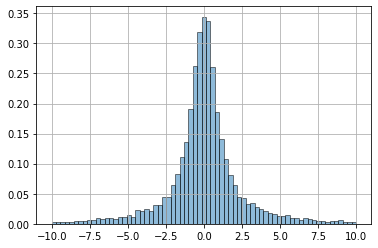

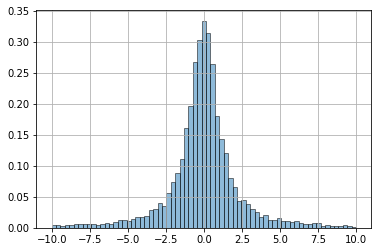

In [20]:
#Función que implementa el método 3 para distribución de Cauchy

def cauchy(r,m):
    result=[]
    for i in range(m):
        a=np.random.standard_cauchy(r)
        result.append(np.sum(1/a)/r)
    return result

#Evaluación y graficación para r=10,100,1000 y 10000, con m=10000
plt.hist(cauchy(10,10000),density=True,alpha=0.5, histtype='bar', ec='black',bins=np.linspace(-10,10,70))
plt.grid()
plt.show()

plt.hist(cauchy(100,10000),density=True,alpha=0.5, histtype='bar', ec='black',bins=np.linspace(-10,10,70))
plt.grid()
plt.show()

plt.hist(cauchy(1000,10000),density=True,alpha=0.5, histtype='bar', ec='black',bins=np.linspace(-10,10,70))
plt.grid()
plt.show()

plt.hist(cauchy(10000,10000),density=True,alpha=0.5, histtype='bar', ec='black',bins=np.linspace(-10,10,70))
plt.grid()
plt.show()

# Punto E

Ejercicio 1

In [21]:
#Función para integrar con método 3, para la primera integral
def metodo3e2(a,b,r):
    data=np.random.uniform(a,b,r)
    y=1/((data)**5+1)
    return (b-a)*np.sum(y)/r

#Evaluación para r=10,100,1000 y 10000
print(metodo3e2(11,21,10))
print(metodo3e2(11,21,100))
print(metodo3e2(11,21,1000))
print(metodo3e2(11,21,10000))

1.3898463864893716e-05
1.4833042701321046e-05
1.6197282908553058e-05
1.5728716810339678e-05


Ejercicio 2

In [22]:
#Función para integrar con método 3, para la segunda integral
def metodo3e4(a,b,r):
    data=np.random.uniform(a,b,r)
    y=1/(np.log(data))
    return (b-a)*np.sum(y)/r
    
#Evaluación para r=10,100,1000 y 10000
print(metodo3e4(12,100,10))
print(metodo3e4(12,100,100))
print(metodo3e4(12,100,1000))
print(metodo3e4(12,100,10000))



23.068030725541217
23.341435134565046
23.00196604655628
23.13189145881132


Ejercicio 3

In [23]:
#Función para integrar con método 3, para la tercera integral
def metodo3e7(a,b,r):
    data=np.random.uniform(a,b,r)
    y=np.sqrt((np.exp(data**2)+np.tan(data)))
    return (b-a)*np.sum(y)/r
    
#Evaluación para r=10,100,1000 y 10000
print(metodo3e7(0,1,10))
print(metodo3e7(0,1,100))
print(metodo3e7(0,1,1000))
print(metodo3e7(0,1,10000))


1.257921689113893
1.448553377532464
1.414741718806842
1.4089310598553049
